<a href="https://colab.research.google.com/github/GuidoGuarda/data_science/blob/main/projetofinalmetricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO FINAL

#Problema

Preciso compara as notas de avaliação com o tempo de entrega, para prever melhores notas com quem entrega mais rápido.

In [2]:
import pandas as pd
import numpy as np

# Criando o DataFrame com 100 linhas
data = {
    'id': range(1, 101),              # Coluna 'id' com valores de 1 a 100
    'nota': np.random.randint(1, 6, 100)  # Coluna 'nota' com valores aleatórios de 1 a 5
}

df = pd.DataFrame(data)

df['entrega'] = np.random.randint(1, 11, 100)
df.head()  # Exibindo as primeiras linhas para conferência


,id,nota,entrega
0,1,2,2
1,2,1,10
2,3,5,6
3,4,4,3
4,5,4,8


In [3]:
df

,id,nota,entrega
0,1,2,2
1,2,1,10
2,3,5,6
3,4,4,3
4,5,4,8
...,...,...,...
95,96,4,5
96,97,3,1
97,98,2,10
98,99,1,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       100 non-null    int64
 1   nota     100 non-null    int64
 2   entrega  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [5]:
df.head()

,id,nota,entrega
0,1,2,2
1,2,1,10
2,3,5,6
3,4,4,3
4,5,4,8


In [6]:
df.head()

,id,nota,entrega
0,1,2,2
1,2,1,10
2,3,5,6
3,4,4,3
4,5,4,8


In [7]:
df['nota']

,nota
0,2
1,1
2,5
3,4
4,4
...,...
95,4
96,3
97,2
98,1


In [8]:
# representar a correlação
corr = df.corr()

In [9]:
corr['nota']

,nota
id,0.013371
nota,1.000000
entrega,-0.157520


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0, 0.5, 'Nota')

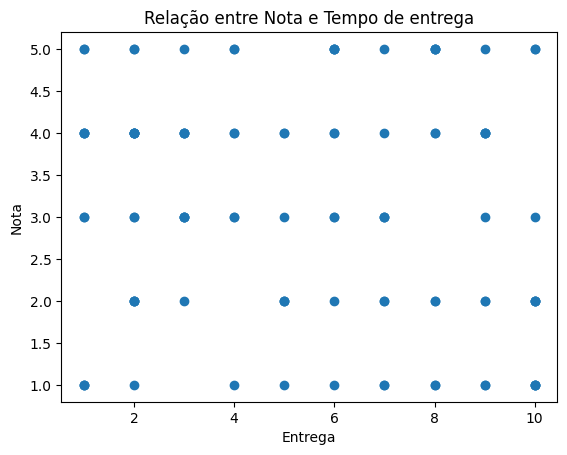

In [11]:
plt.scatter(df['entrega'], df['nota'])
plt.title("Relação entre Nota e Tempo de entrega")
plt.xlabel("Entrega")
plt.ylabel("Nota")

#Ajuste da Reta

In [12]:
px.scatter(df, x = 'entrega', y = 'nota', trendline_color_override="red", trendline = 'ols' )

# Histograma de Distribuição da Nota de avaliação

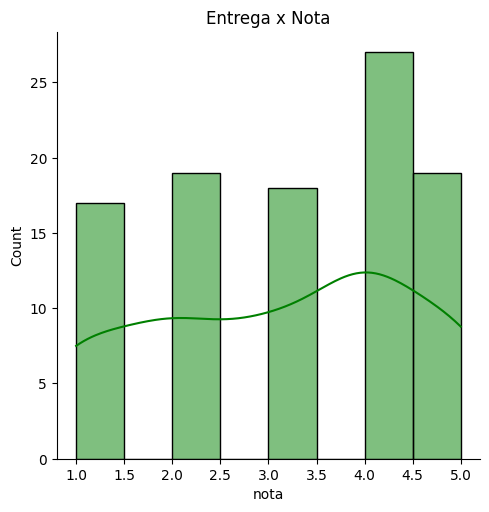

In [13]:
# Como que essa reta foi estabelecida?

sns.displot(df['nota'],kde=True,color='green')
plt.title('Entrega x Nota')
plt.show()

In [15]:
X = df.drop(columns='id') # Changed 'default' to 'id'

In [16]:
y = df['nota']

In [17]:
# Separar treino e teste
from sklearn.model_selection import train_test_split
SEED = 85
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=SEED)

In [18]:
# definir algoritmo
# importar Regressão Logística
from sklearn.linear_model import LogisticRegression
# criar objeto
modelo = LogisticRegression(max_iter=3890)

In [19]:
# VAMOS TREINAR
modelo.fit(X_train,y_train)

LogisticRegression(max_iter=3890)

1. Acurácia do Treino
2. Acurácia do Teste
3. Matriz Confusão
4. Classification Report
5. Curva ROC

In [20]:
# 1. Acurácia de Treino
print(f"acurácia: {modelo.score(X_train,y_train):.2f}")

acurácia: 0.94


In [21]:
# 2. Acurácia de Teste
previsoes = modelo.predict(X_test)

In [22]:
previsoes

array([4, 1, 4, 5, 2, 1, 5, 3, 4, 4, 5, 1, 1, 3, 2, 4, 2, 4, 3, 4, 4, 1,
       5, 4, 4, 2, 2, 2, 1, 5])

In [23]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, previsoes)

In [24]:
print(f"A acurácia de teste foi: {acuracia * 100:.2f}%")

A acurácia de teste foi: 83.33%


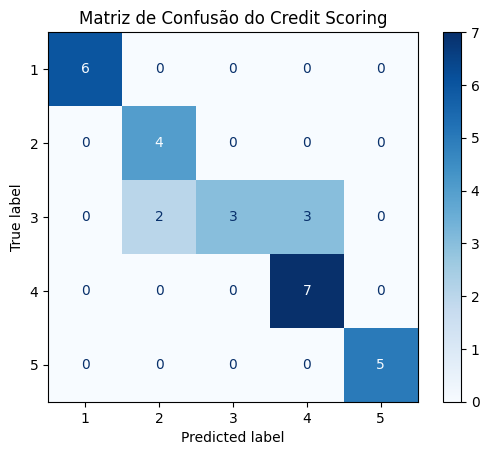

In [25]:
# importar matplotlib
import matplotlib.pyplot as plt
# importar ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
# fazendo a previsão com o modelo treinado usando dados de teste
# o que é classe? Conjunto de Objetos
# O que é um objeto? é uma  instância da classe.
y_pred = modelo.predict(X_test)
# Criando a matriz confusão
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Blues')
# Adicionar um título
plt.title('Matriz de Confusão do Credit Scoring')
# Mostrar
plt.show()

1-Acuracy

2-Precision

3-Recall

5-F1 - SCORE

6-Support

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,previsoes))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         4
           3       1.00      0.38      0.55         8
           4       0.70      1.00      0.82         7
           5       1.00      1.00      1.00         5

    accuracy                           0.83        30
   macro avg       0.87      0.88      0.83        30
weighted avg       0.89      0.83      0.81        30



In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0, 0.5, 'Nota')

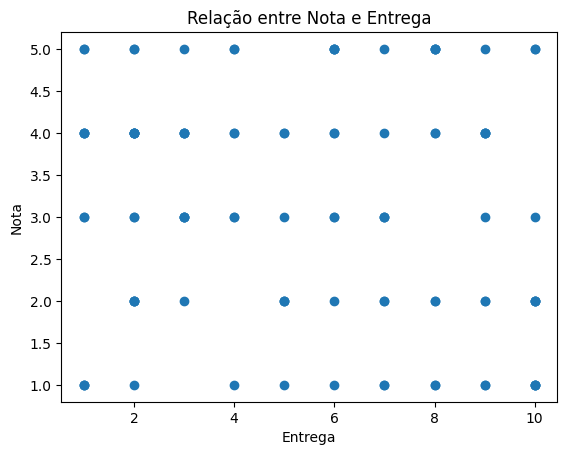

In [28]:
plt.scatter(df['entrega'], df['nota'])
plt.title("Relação entre Nota e Entrega")
plt.xlabel("Entrega")
plt.ylabel("Nota")

Text(0, 0.5, 'Nota')

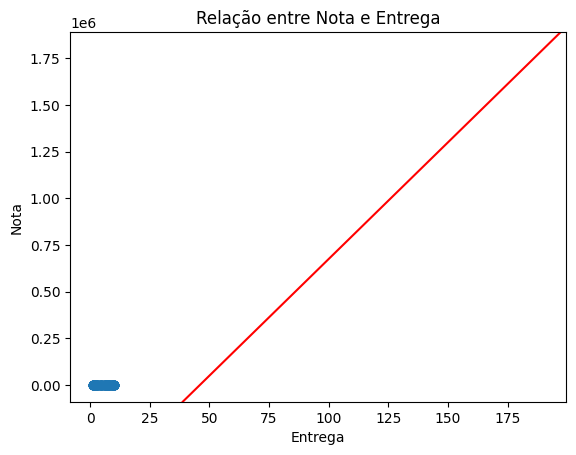

In [29]:
plt.scatter(df['entrega'], df['nota'])
plt.axline(xy1 = (66, 250000),xy2 = (190, 1800000), color = "red" )
plt.title("Relação entre Nota e Entrega")
plt.xlabel("Entrega")
plt.ylabel("Nota")

##Machine Learning

In [31]:
# import train_test_split
from sklearn.model_selection import train_test_split

## Definindo X e y

In [32]:
# definindo y e x
y = df['nota'] # variavel resposta
x = df.drop(columns='nota')

## Dividindo Treino e Teste

In [33]:
# aplicando o split do y e x
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=230)

## Dados de Treino para usar na Fórmula

In [34]:
# dados de treino para usar a formula
df_train = pd.DataFrame(data=X_train)
df_train['nota']  = y_train

In [35]:
# import ols
from statsmodels.formula.api import ols # essa biblioteca vai nos ajudar a criar um modelo de regressao

In [36]:
# ajustando o primeiro modelo (reta)
modelo_0 = ols('nota ~ entrega',data=df_train).fit()

## Interpretar os parâmetros da regressão linear

In [37]:
# Vou acessar o método params
# Ao executar, ele acessou o modelo
# trouxe dois fatores
# Intercept
# Entrega:
modelo_0.params

,0
Intercept,3.351267
entrega,-0.054380


# Esse efeito é siginificativo?

In [38]:
# existe um efeito significativo:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   nota   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.055
Date:                Mon, 18 Nov 2024   Prob (F-statistic):              0.308
Time:                        15:37:44   Log-Likelihood:                -122.76
No. Observations:                  70   AIC:                             249.5
Df Residuals:                      68   BIC:                             254.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3513      0.345      9.719      0.0

In [39]:
# observando o R²
modelo_0.rsquared

0.015277317380314459

In [40]:
# obtendo resíduos
modelo_0.resid

,0
84,0.811872
25,-1.807471
35,2.083770
38,-0.970610
5,-0.242508
...,...
15,1.703112
83,0.192529
48,2.192529
99,-1.079369


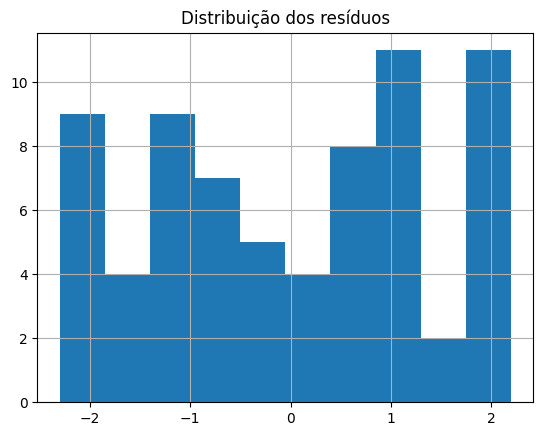

In [41]:
# mostrar em um histograma

modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

In [42]:
# o outro pedaço de teste
# comparar que o modelo preveu e o valor real da nota
# obtendo o R² da previsão

y_predict = modelo_0.predict(X_test)

# importando o r2_score
from sklearn.metrics import r2_score
# printando r²

print("R²",r2_score(y_test,y_predict))

R² 0.010999515892091027


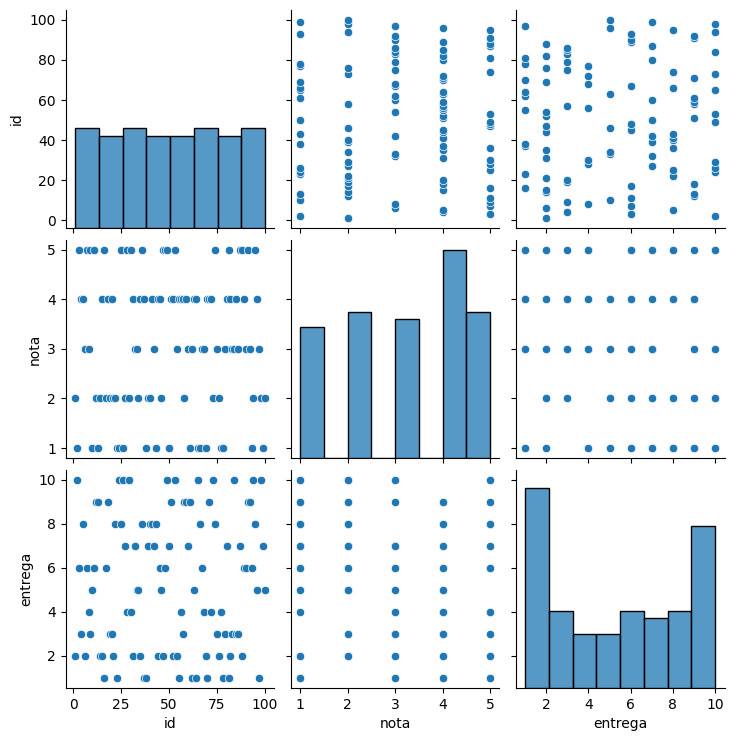

In [43]:
# explicabilidade do modelo
sns.pairplot(df)

In [44]:
df.columns

Index(['id', 'nota', 'entrega'], dtype='object')

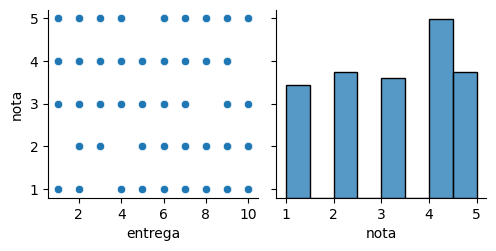

In [46]:
sns.pairplot(df,y_vars='nota',x_vars=['entrega','nota'])

#Métricas

In [47]:
# importando a api do statemodels
import statsmodels.api as sm

In [48]:
# adicionando constante
X_train = sm.add_constant(X_train)

In [49]:
X_train.head()

,const,id,entrega
84,1.0,85,3
25,1.0,26,10
35,1.0,36,8
38,1.0,39,7
5,1.0,6,2


In [50]:
modelo_1 = sm.OLS(y_train,X_train[['entrega']]).fit()

In [51]:
print(modelo_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   nota   R-squared (uncentered):                   0.585
Model:                            OLS   Adj. R-squared (uncentered):              0.579
Method:                 Least Squares   F-statistic:                              97.20
Date:                Mon, 18 Nov 2024   Prob (F-statistic):                    8.34e-15
Time:                        15:44:16   Log-Likelihood:                         -153.25
No. Observations:                  70   AIC:                                      308.5
Df Residuals:                      69   BIC:                                      310.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
# Instead of trying to access data.target, you should use the key corresponding to the target variable
# within the dictionary. Based on the value of the 'data' variable, it looks like 'nota' might be the
# target variable.
y = data['nota']

In [54]:
X

,nota,entrega
0,2,2
1,1,10
2,5,6
3,4,3
4,4,8
...,...,...
95,4,5
96,3,1
97,2,10
98,1,7


In [55]:
type(X)

pandas.core.frame.DataFrame

In [56]:
y

array([2, 1, 5, 4, 4, 3, 5, 3, 5, 1, 5, 2, 1, 2, 4, 5, 2, 4, 2, 4, 2, 2,
       1, 1, 5, 1, 2, 5, 2, 5, 4, 3, 3, 2, 4, 5, 4, 1, 2, 2, 4, 3, 1, 4,
       4, 2, 5, 5, 5, 1, 4, 4, 5, 3, 4, 4, 4, 2, 4, 3, 1, 3, 4, 4, 1, 1,
       3, 3, 1, 4, 4, 4, 2, 5, 3, 2, 1, 1, 3, 4, 5, 4, 3, 3, 4, 3, 5, 5,
       4, 3, 5, 3, 1, 2, 5, 4, 3, 2, 1, 2])